In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2326&path=adult-census-income.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [4]:
df = df.replace("?", np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df[df['native.country'].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,NaN,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [6]:
df = df.dropna()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30135,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30136,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30137,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


La variable "education" (categórica) da información duplicada, "education.num" (numérica) refleja el nivel edicativo con números de forma ordinal.

La variable fnlwgt representa el numero de censo de esa persona, se puede eliminar

In [8]:
df = df.drop(['education', 'fnlwgt'], axis =1)
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30135,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30136,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30137,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30139 entries, 0 to 30138
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   education.num   30139 non-null  int64 
 3   marital.status  30139 non-null  object
 4   occupation      30139 non-null  object
 5   relationship    30139 non-null  object
 6   race            30139 non-null  object
 7   sex             30139 non-null  object
 8   capital.gain    30139 non-null  int64 
 9   capital.loss    30139 non-null  int64 
 10  hours.per.week  30139 non-null  int64 
 11  native.country  30139 non-null  object
 12  income          30139 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.0+ MB


In [10]:
df['native.country'].value_counts(dropna=False)

native.country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Haiti                            42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

In [11]:
df.loc[df['native.country'] == 'United-States', 'native.country'] = 'USA'
df.loc[df['native.country'] != 'USA', 'native.country'] = 'Non-USA'
df['native.country'].value_counts()

native.country
USA        27487
Non-USA     2652
Name: count, dtype: int64

In [12]:
df[df['native.country'] == 'Non-USA']

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
20,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Non-USA,<=50K
21,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,Non-USA,<=50K
40,73,Self-emp-not-inc,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Non-USA,<=50K
54,51,Self-emp-not-inc,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,2415,40,Non-USA,>50K
57,55,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,35,Non-USA,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30058,85,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Non-USA,<=50K
30098,45,Private,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Non-USA,<=50K
30117,54,Private,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Non-USA,>50K
30127,43,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Non-USA,<=50K


In [13]:
df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,10.122532,1092.841202,88.439928,40.934703
std,13.131426,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
X = df.drop(['income'], axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((24111, 12), (6028, 12))

In [15]:
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()

In [16]:
X_train_cat_le = X_train[cat_cols].copy()
X_test_cat_le = X_test[cat_cols].copy()

le_dict = {}
# instancio el encoder
for col in cat_cols:
    le = LabelEncoder()
    X_train_cat_le[col] = le.fit_transform(X_train_cat_le[col])
    X_test_cat_le[col] = le.transform(X_test_cat_le[col])
    le_dict[col] = le

X_train_cat_le.head()

,workclass,marital.status,occupation,relationship,race,sex,native.country
2290,5,2,0,0,4,1,1
4472,1,5,7,4,2,0,1
5478,2,2,13,0,4,1,1
27310,2,2,11,0,4,1,1
28148,2,4,7,3,2,1,1


In [17]:
# instancio el escalador
scaler = StandardScaler()

X_train_num_scal = scaler.fit_transform(X_train[num_cols])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_cols)
    
X_test_num_scal = scaler.transform(X_test[num_cols])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_cols)

X_train_num_scal.head()

,age,education.num,capital.gain,capital.loss,hours.per.week
2290,1.259355,1.124235,0.896711,-0.221265,-0.245948
4472,0.801909,-1.615607,-0.148596,-0.221265,-0.079549
5478,-0.189222,-2.007013,-0.148596,-0.221265,0.752448
27310,-0.112981,1.124235,-0.148596,-0.221265,1.584444
28148,-1.485317,-0.049983,-0.148596,-0.221265,-1.327544


In [18]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_le], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_le], axis=1)

X_train_final.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country
2290,1.259355,1.124235,0.896711,-0.221265,-0.245948,5,2,0,0,4,1,1
4472,0.801909,-1.615607,-0.148596,-0.221265,-0.079549,1,5,7,4,2,0,1
5478,-0.189222,-2.007013,-0.148596,-0.221265,0.752448,2,2,13,0,4,1,1
27310,-0.112981,1.124235,-0.148596,-0.221265,1.584444,2,2,11,0,4,1,1
28148,-1.485317,-0.049983,-0.148596,-0.221265,-1.327544,2,4,7,3,2,1,1


In [19]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [20]:
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})

y_train.head()

2290     1
4472     0
5478     0
27310    1
28148    0
Name: income, dtype: int64

In [21]:
# Guardamos los datos en formato .csv
X_train_final.to_csv("../data/processed/X_train.csv", index=False)
X_test_final.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

Queremos predecir si una persona gana mas de 50K o menos de 50K en funcion de sus características demográficas.

In [22]:
model = RandomForestClassifier(max_depth=6, class_weight='balanced', criterion = 'entropy', random_state = 42)

# entrenamiento
model.fit(X_train_final, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


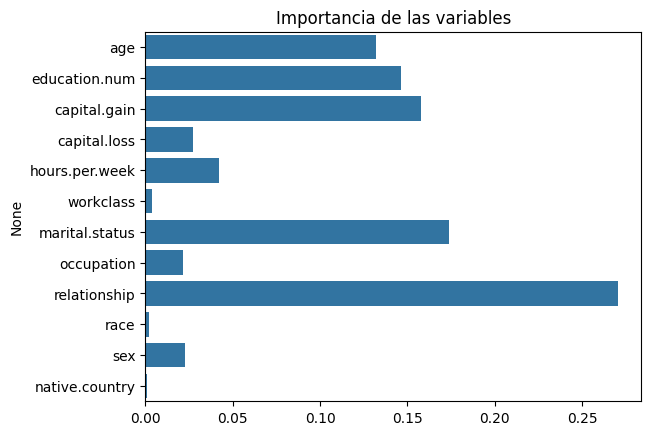

In [23]:
# Visualilzación de la importancia de las variables
importances = model.feature_importances_
sns.barplot(x=importances, y=X_train_final.columns)
plt.title("Importancia de las variables")
plt.show()

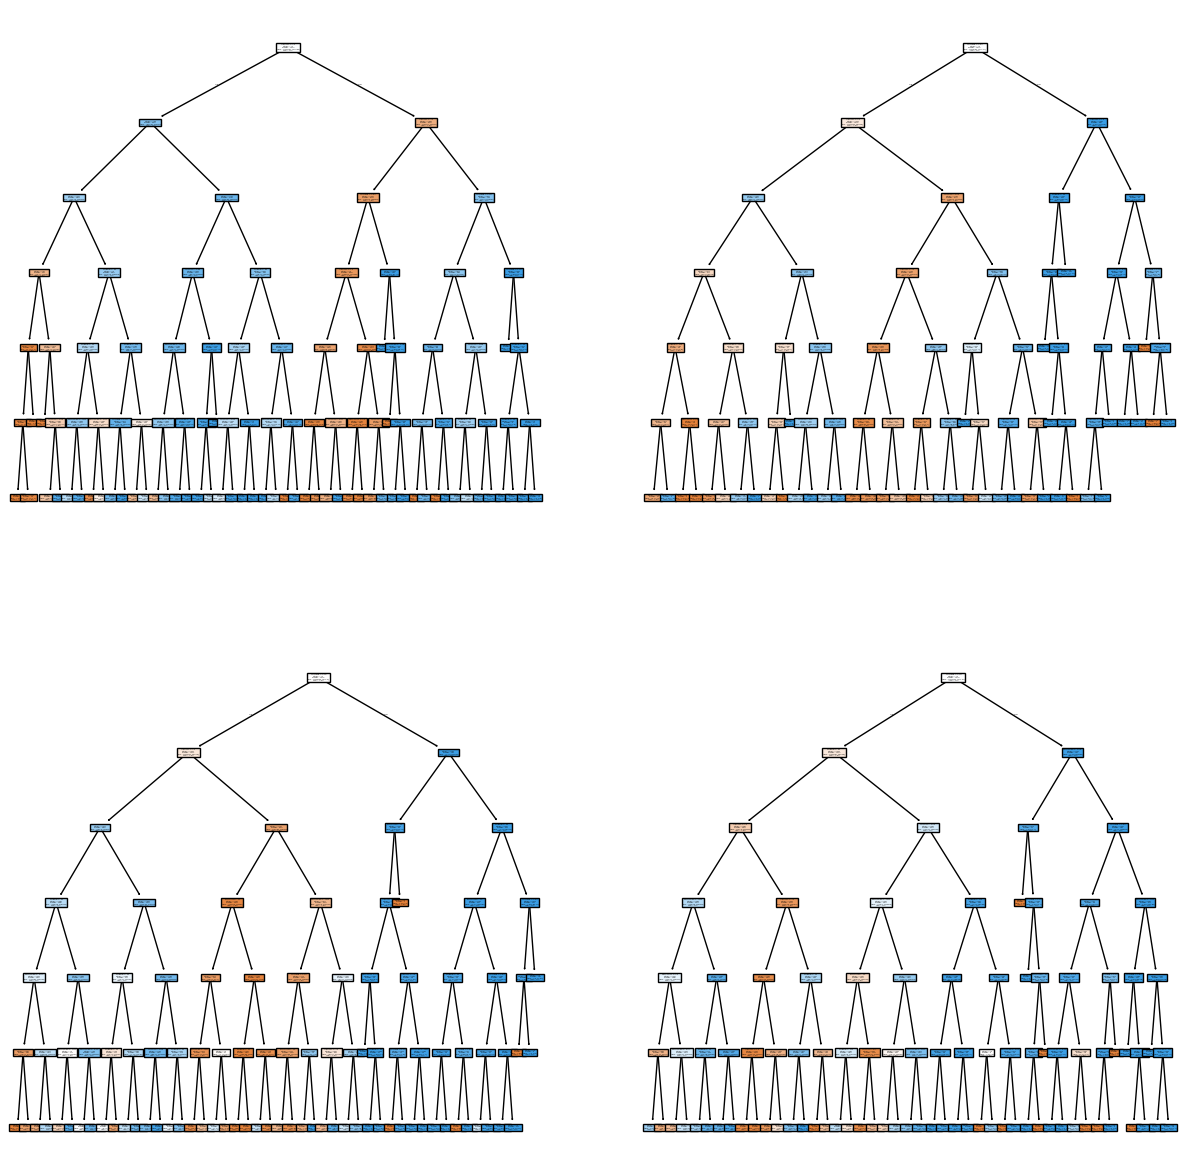

In [24]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["<=50K", ">50K"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train_final.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train_final.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train_final.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train_final.columns), class_names = clases, filled = True)

plt.show()

In [25]:
# predicción
y_pred_test = model.predict(X_test_final)
y_pred_train = model.predict(X_train_final)
y_pred_test

array([1, 1, 1, ..., 0, 1, 0], shape=(6028,))

In [26]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print(classification_report(y_test, y_pred_test, target_names=["<=50K", ">50K"]))

Accuracy Test:  0.7636031851360319
F1 score Test:  0.6427676109300576
Precision Test:  0.50452577725305
Recall Test:  0.8853591160220995
Accuracy Train:  0.7769482808676538
F1 score Train:  0.6679016919846857
Precision Train:  0.5335438042620363
Recall Train:  0.8927038626609443
              precision    recall  f1-score   support

       <=50K       0.95      0.73      0.82      4580
        >50K       0.50      0.89      0.64      1448

    accuracy                           0.76      6028
   macro avg       0.73      0.81      0.73      6028
weighted avg       0.84      0.76      0.78      6028



Este modelo detecta bien quién podría superar los 50K (recall = 0.89), pero algunas recomenddaciones pueden ser optimistas (precisión = 0.50), lo que indica la presencia de bastantes falsos positivos

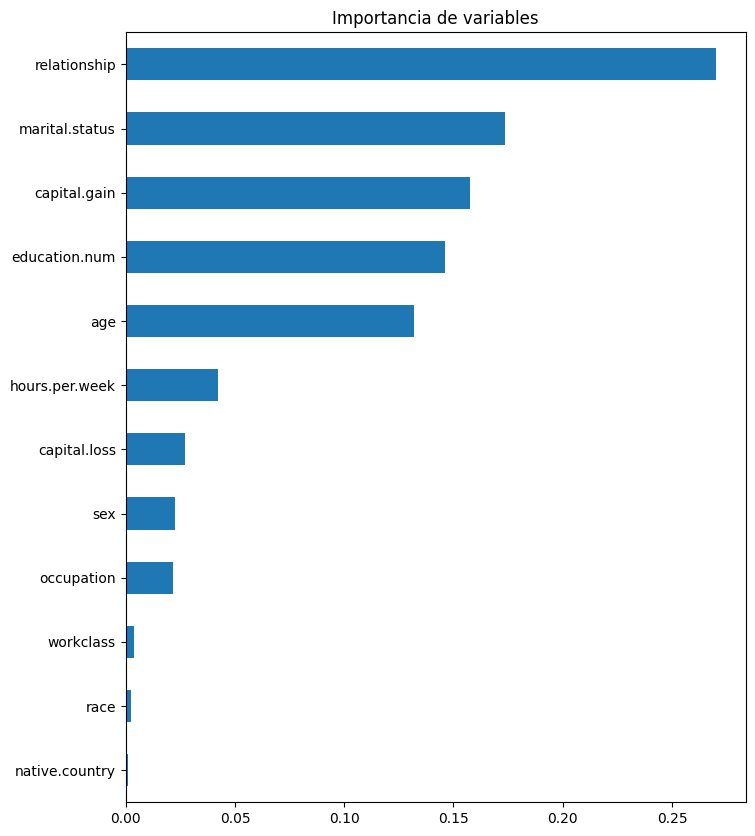

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_final.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.title("Importancia de variables")
plt.show()

In [28]:
# Variables que más influyen en ganar >50K
feat_importances.sort_values(ascending=False)

relationship      0.270224
marital.status    0.173496
capital.gain      0.157444
education.num     0.146193
age               0.131711
hours.per.week    0.042418
capital.loss      0.027132
sex               0.022644
occupation        0.021729
workclass         0.003708
race              0.002334
native.country    0.000967
dtype: float64

Según las variables más importantes del modelo, las características que más incrementan la probabilidad de obtener un salario >50K son:

El tipo de relación que tenga, o el estado civil (relationship, marital.status)

Generar ingresos adicionales por inversiones (capital_gain)

Tener un nivel educativo más alto (education.num)

Tener cierta experiencia laboral asociada a la edad (age)

Queremos recomendar qué características personales y laborales deberían cambiarse para aumentar la probabilidad de que una persona gane más de 50K al año, según el modelo entrenado (Random Forest)

Las variables que definen el perfil del usuario:

* relationship
* marital.status
* capital.gain
* education.num
* age
* hours.per.week
* capital.loss
* sex
* occupation 
* workclass
* race
* native.country

In [40]:
# Separar a usuarios que ganan > 50K dentro de train para usarlos de referencia
usuarios_df = X_train_final.copy()
usuarios_df['income'] = y_train.values  

usuarios_exito = usuarios_df[usuarios_df['income'] == 1].drop('income', axis=1)
usuarios_exito

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country
2290,1.259355,1.124235,0.896711,-0.221265,-0.245948,5,2,0,0,4,1,1
27310,-0.112981,1.124235,-0.148596,-0.221265,1.584444,2,2,11,0,4,1,1
208,2.402968,-0.441389,-0.148596,5.085797,-0.079549,2,2,5,0,4,1,1
2605,1.106873,1.124235,0.843685,-0.221265,-0.079549,2,2,0,0,4,1,1
2587,1.183114,1.515641,0.843685,-0.221265,-0.079549,2,2,9,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2433,0.954391,2.298454,0.896711,-0.221265,1.168446,5,2,3,0,4,1,1
769,-0.265463,-0.441389,-0.148596,4.385187,0.086850,2,2,0,5,4,0,1
1685,-0.646667,0.341423,1.894159,-0.221265,2.000443,4,2,9,0,4,1,1
28020,0.268223,-0.049983,-0.148596,-0.221265,-0.079549,0,2,0,0,4,1,1


In [ ]:
# Creamos el perfil de un usuario hipotético
perfil_usuario = {
    "age": 30,
    "education.num": 16,
    "capital.gain": 0,
    "capital.loss": 0,
    "hours.per.week": 40,
    "workclass": 'Private',
    "marital.status": 'Never-married',
    "occupation": "Prof-specialty",
    "relationship": "Not-in-family",
    "race" : "White",
    "sex":"Female",
    "native.country":"Non-USA",
}

In [32]:
# Convertimos usuario en Dataframe

usuario_ej = pd.DataFrame([perfil_usuario])[X_train_final.columns]

# Aplicar el encoder en las variables categóricas

for col in cat_cols:
    encoder = le_dict[col]
    usuario_ej[col] = encoder.transform(usuario_ej[col])

# Aplicar scaler a variables numéricas

usuario_ej[num_cols] = scaler.transform(usuario_ej[num_cols])

usuario_ej


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country
0,-0.646667,2.298454,-0.148596,-0.221265,-0.079549,2,4,9,1,4,0,0


In [ ]:
# Calculamos la probabilidad de que el usuario hipotético gane más de 50K, según modelo

prob_actual = model.predict_proba(usuario_ej)[0,1]
prob_actual


np.float64(0.33658122669433405)

Según el modelo, este usuario tiene un 34% de probabilidad de ganar más de 50K

In [ ]:
# Medimos qué tan parecido es nuestro usuario a los perfiles que ya ganan más de 50K

sim = cosine_similarity(usuario_ej, usuarios_exito)
sim

array([[0.45043261, 0.94842938, 0.68461767, ..., 0.90712018, 0.45430727,
        0.94263174]], shape=(1, 6058))

In [43]:
# Encontramos los 10 usuarios exitosos más similares al usuario hipotético

top_sim = usuarios_exito.iloc[sim[0].argsort()[-10:]]
top_sim


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country
10467,-0.189222,1.907048,-0.148596,-0.221265,-0.079549,2,4,9,1,3,1,0
7134,0.420705,1.907048,-0.148596,-0.221265,-0.079549,2,4,9,1,4,0,1
22182,-0.036740,1.907048,-0.148596,-0.221265,0.752448,2,4,9,1,4,0,1
15215,-0.417945,1.907048,-0.148596,-0.221265,-0.079549,2,4,9,1,4,1,1
21794,0.039501,1.515641,-0.148596,-0.221265,-0.079549,2,4,9,1,4,0,1
13839,-0.494185,2.298454,-0.148596,-0.221265,-0.079549,2,4,9,1,4,1,1
14261,-0.112981,1.515641,-0.148596,-0.221265,-0.245948,2,4,9,1,4,0,1
9776,-0.417945,1.907048,-0.148596,-0.221265,0.752448,2,4,9,1,4,0,1
21630,-0.341704,1.515641,-0.148596,-0.221265,-0.079549,2,4,9,1,4,0,1
11016,-0.341704,2.298454,-0.148596,-0.221265,-0.079549,2,4,9,1,4,1,0


In [ ]:
# Comparamos al usuario hipotético con el promedio del top similares
promedio_mejores = top_sim.mean()
diferencias = promedio_mejores - usuario_ej.iloc[0]
diferencias

age               4.574452e-01
education.num    -4.305467e-01
capital.gain      0.000000e+00
capital.loss      2.775558e-17
hours.per.week    1.497594e-01
workclass         0.000000e+00
marital.status    0.000000e+00
occupation        0.000000e+00
relationship      0.000000e+00
race             -1.000000e-01
sex               4.000000e-01
native.country    8.000000e-01
dtype: float64

Los resultados muestran que las personas con ingresos superiores a 50K suelen ser de mayor edad que nuestro usuario, factor que no puede considerarse una recomendación porque no es modificable. También se observa que quienes ganan más tienden a trabajar más horas por semana, que la mayoría pertenece al sexo masculino y que proceden de Estados Unidos

En cuanto a las características que sí pueden cambiarse, como el nivel educativo o la ocupación, el perfil del usuario ya está bastante alineado con el grupo de mayores ingresos